# Assignment 1: The transient response of a river aquifer to rainfall

### Name : Cedric PIZINA

In class we considered the charging and discharging of a model aquifer fed by rainfall rate $R$.  The aquifer spans the distance between the river, at $x = 0$, and the drainage divide at $x = L$.  

As discussed in class, the equation governing the transient response of the aquifer is $$\phi\frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right) + R,$$ where $\phi$ is the porosity of the aquifer (assumed constant), $h(x,t)$ is the depth of the groundwater surface which can vary in space $x$ and time $t$, $u_b = k\rho g/\mu$ is the buoyancy velocity in the aquifer which is here written in terms of the permeability $k$, the density of water $\rho$, gravitational acceleration $g$ and the dynamic viscosity of water $\mu$.

In addition to specifying the evolution of the groundwater surface, we require that the height of the aquifer at the river is zero and further specify that there is no flux of fluid through the drainage divide, $$h(0,t) = 0 \quad \mbox{and} \quad q(L,t) = \left.-u_b h\frac{\partial h}{\partial x}\right|_{x = L} = 0.$$

### Numerical preliminaries

Evaluate the following cell first to load various packages which will be useful for completing this assignment.

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

### Sketch of the aquifer geometry

Make a sketch of the model geometry, being careful to include axes and label all relevant quantities.  You should provide a succinct caption to your model sketch.

![Alt Text](IMG_5032.jpeg)

The Darcy's equation is written as
$$\mu \textbf{u} = k(-\nabla p + \rho \textbf{g})$$  
where $\textbf{u}=(u, 0)$. In the horizontal direction it gives $$u = \frac{k}{\mu} \frac{\partial p}{\partial x}$$
In the vertical direction, the equation gives the pessure which characterizes hydrostatic pressure
$p = \rho g (h - y)$. 

Note that when $p(y=h) = 0$ at the water table (atmospheric) and $p(y=0)=\rho g h$ at the bottom ($y=0$) of the medium. 
Then the expression of $u$ becomes 

$$u = \frac{\rho g k}{\mu} \frac{\partial h}{\partial x} $$

The volume rate $q$ of water at a given position $x$ is given by the flux of the Darcy velocity $\textbf{u}$, which is written $$q = \int_0^h u dy = hu$$ since $u$ does not depend explicitly on $y$ in this expression.

Now let's take a volume of control between $x$ and $x+\delta x$ and write down the mass conservation equation over a small intervall of time $\delta t$. 
![Alt Text](fff.png)

The principle is that the input and output should balance up to a change in the volume, that is 
$$ (q(x+\delta x) + R\delta x )\delta t = q(x) \delta t + \phi \delta h \delta x$$
$$ \left(q(x+\delta x) - q(x)\right) \delta t + R\delta x \delta t = \phi \delta h \delta x$$
By dividing the equation by $\delta x \delta t$, it becomes
$$ \dfrac{q(x+\delta x) - q(x)}{\delta x } + R = \phi\dfrac{  \delta h}{\delta t}$$

$$ \dfrac{\partial q}{\partial x} + R = \phi \dfrac{ \partial h}{\partial t}$$

Recall $q = hu =  \frac{k}{\mu} h \frac{\partial p}{\partial x} $, therefore 
 $$\phi\frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right) + R, \tag{Eq 1}$$ where $u_b = k\rho g/\mu$

### General scaling

Scale the governing equation and boundary conditions, and hence find a non-dimensional form of the evolution equation.

Recall the governing equation $$\phi\frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right) + R$$

In terms of scaling, the system has an intrinsic length $x = L$ as we know the distance between the river and the drainage divide. That means we only need to find the time scale and the height scale. Define $T$ and $H$ as scales of $t$ and $h$ to be determined in terms of the known scale $L$ using the governing equation (Eq 1). Then it follows
$$ \phi \frac{H}{T} \sim u_b \frac{H^2}{L^2} \sim R$$ 
After some algebra, we find that $$ H \sim \left(\frac{R}{u_b}\right)^{1/2} L \, , \quad  T\sim \frac{\phi L}{(u_b R)^{1/2}} $$
To find a non dimensional form of the evolution equation, consider the scaling $x = Lx' $, $t = T t'$ and $h = H h'$. Using the result above, 
$$ h =   \left(\frac{R}{u_b}\right)^{1/2} L h' \, \quad t = \frac{\phi L}{(u_b R)^{1/2}} t'$$ Then the governing equation becomes
$$ \phi \frac{H}{T} \frac{\partial h'}{\partial t'} = u_b \frac{H^2}{L^2} \frac{\partial }{\partial x'} \left(h'\frac{\partial h'}{\partial x'}\right) + R$$

$$ \phi \left(\frac{R}{u_b}\right)^{1/2} L    \frac{ (u_b R)^{1/2}}{\phi L} \frac{\partial h'}{\partial t'} = u_b \frac{1}{L^2} \frac{R}{u_b}L^2  \frac{\partial }{\partial x'} \left(h' \frac{\partial h'}{\partial x'}\right)+ R$$

$$ R \frac{\partial h'}{\partial t'} = R \frac{\partial }{\partial x'} \left(h' \frac{\partial h'}{\partial x'}\right)+ R$$

$$  \frac{\partial h'}{\partial t'} =  \frac{\partial }{\partial x'} \left( h' \frac{\partial h'}{\partial x'}\right)+ 1$$ 
is the scaled governing equation whose boundary conditions are 
$$h'(0, t') = 0 , \quad q'(1,t') = - u_b \frac{H^2}{L^2} h'\frac{\partial h' }{\partial x'} \Big|_{x'=1} =  - R h'\frac{\partial h' }{\partial x'} \Big|_{x'=1} = 0$$ 

For simplicity and to be consistent with the code, we are going to drop the primes in the scaled equations but keeping track of the fact that these are scaled equations. In other words, we write
$$  \frac{\partial h}{\partial t} =  \frac{\partial }{\partial x} \left( h \frac{\partial h}{\partial x}\right)+ 1$$ with boundary conditions $$h(0, t) = 0 , \quad \text{and} \quad q(1,t) =  -  h\frac{\partial h }{\partial x} \Big|_{x=1} = 0$$ 

### Steady-state aquifer profile

Derive the steady-state, non-dimensional aquifer profile and plot the profile.  

At steady state, the profile of the water table becomes insensible no matter what happens, the system reaches the equilibrium. This exhibits that when the aquifer is filled of water, the amount of incoming rainfall will be tranfered in the river and does not change the profile of the aquifer. Mathematically, at steady state, $h = h(x)$ and $$ \frac{\partial h}{\partial t} = 0$$
$$\frac{d }{d x} \left( h \frac{d h}{d x}\right)+ 1=0$$

$$ \frac{d }{d x} \left( h \frac{d h}{d x}\right) = -1 $$

$$ h \frac{d h}{d x} = - x + C $$ where $C$ is a constant which turns out to be $1$ because the boundary condition 
$$-  h\frac{\partial h }{\partial x} \Big|_{x=1} = 0$$ Therefore 
$$ h \frac{d h}{d x} = - x + 1 $$

$$ \frac{d h^2}{d x} = 2 - 2x $$
$$ h^2 = 2x - x^2 + D $$
Since $h(0) =0$ then $D=0$. Hence
$$h(x) = (2x - x^2)^{1/2}$$
The aquifer profile at the steady sate given by the figure below.

Text(0, 0.5, '$h(x)$')

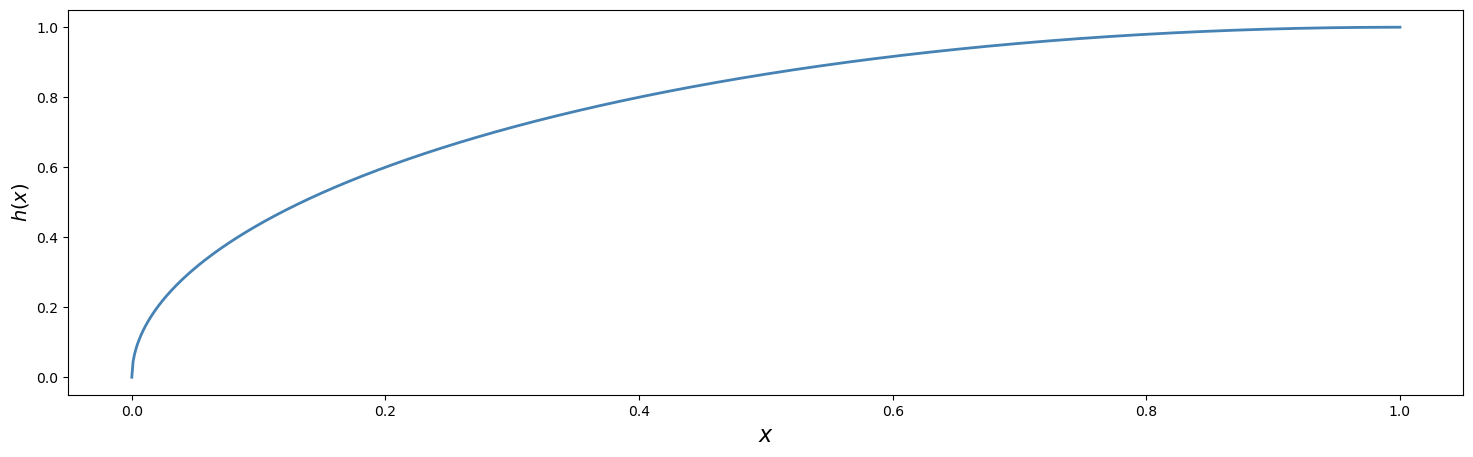

In [3]:
def steady_state(x):
    h = (2*x - x**2)**(1/2)
    return h
x = np.linspace(0,1,1000)
plt.figure(figsize=(18,5))
plt.plot(x, steady_state(x), color='steelblue', linewidth = 2)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$h(x)$', fontsize=14)

### Flux-conserving scheme

You are provided with a numerical code which solves the porous gravity current equation below.  It is written using a flux conserving scheme (see Wednesday's practical - Jupyter Notebook for details) but without rainfall.  You will see in the code below that you also need to either verify or modify the boundary conditions at the river and the drainage divide.  Adapt this code to solve the PDE governing the evolution of the aquifer with rainfall, and with the boundary conditions specified above. Hence evaluate the flux into the river as a function of time.  You should write a succinct description of the numerical scheme.

[_Note that I have used a grid with just 20 points.  It is a good idea to use a coarse grid when you are trying to get a program to work so that the run time is short.  Once you are confident that the code is working, you can increase the resolution by increasing the number of grid points._]

Start with an initially empty aquifer, $h(x,0) = 0$, with fixed rainfall rate and numerically integrate forwards until an approximate steady state has been reached.  Find the approach to the steady-state profile, by plotting the height of the aquifer at regular time intervals.

Numerically evaluate and plot the river flux as a function of time.  

Once you have done these two steps, follow the questions in the remaining sections to assess the scaling relationships discussed in class with your code.

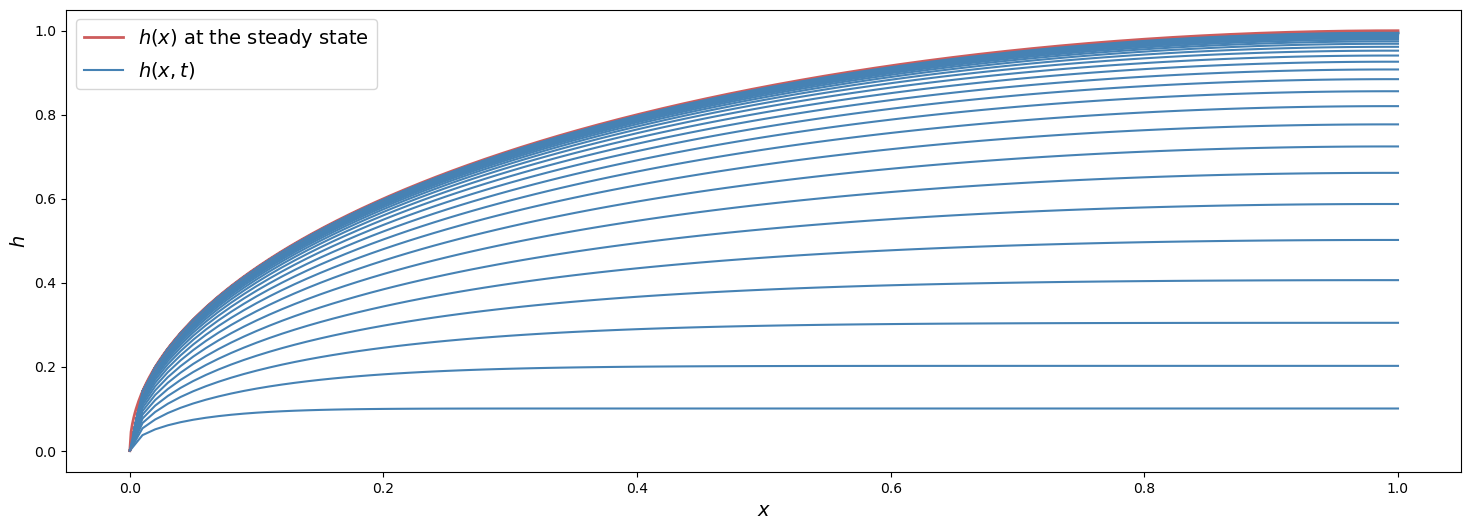

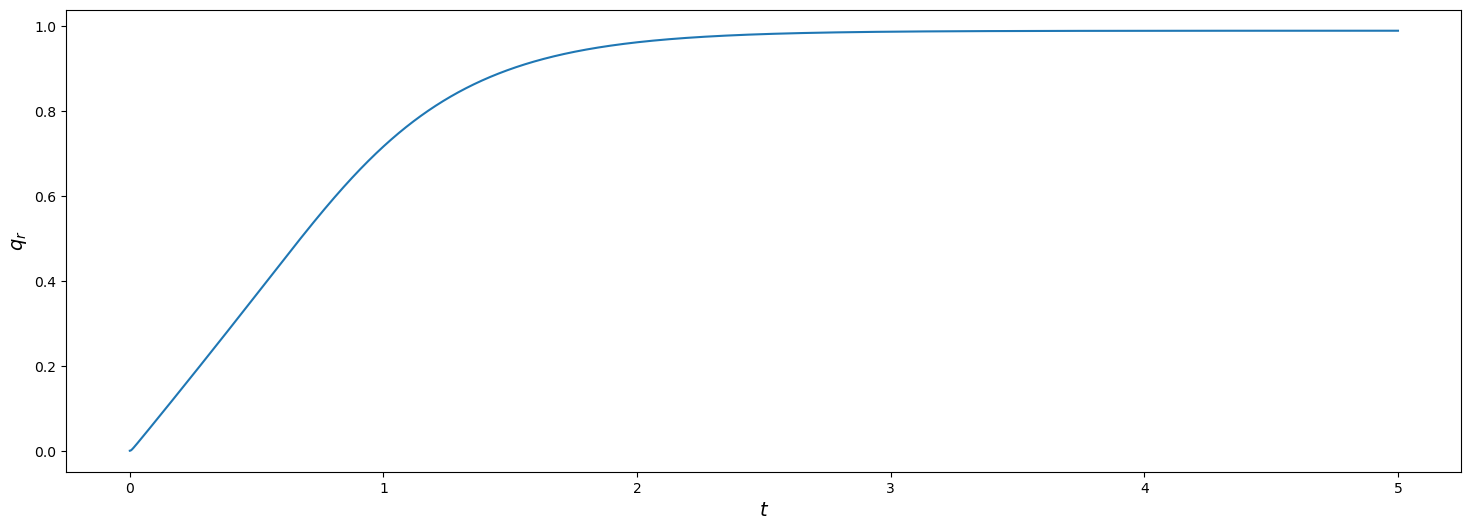

500001


In [41]:
# Setup the numerical simulation
N = 100         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 5

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time and current, h0, and future, h1, profiles
t = 0

h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
plt.figure(figsize=(18,6))
while t < t_final:

    # Boundary condition at the river
    h1[0] = 0

    # evolve the interior of the groundwater profile , the rainfall is given by the term 2*dx**2 inside the bracket
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2 + 2*dx**2)

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-1] 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux: # the flux we are interested in is the flux in -x direction at x=0
    # therefore the flux is given by the above code 
    
    flux = (h1[1]**2 - h1[0]**2)/(2*dx)  
    time = np.append(time,t)
    qr = np.append(qr, flux) 
    
    # plot the aquifer profile for each time step dt
    if t > t_plot: 
        plt.plot(x,h0, color='steelblue')
        t_plot = t_plot + dt_plot
    
# steady state profile for comparison
# it's worth calculating the steady-state profile to compare with your transient numerical solution.
x_val = np.linspace(0,1,1000)
plt.plot(x_val, steady_state(x_val), linewidth = 2, color = 'indianred', label = '$h(x)$ at the steady state')
plt.legend(fontsize=14)
 
plt.plot(x, h0, label = '$h(x,t)$', color = 'steelblue')
plt.legend( fontsize=14)
plt.xlabel("$x$",  fontsize=14)
plt.ylabel("$h$",  fontsize=14)
plt.show()

plt.figure(figsize=(18,6))
plt.plot(time,qr)
plt.xlabel("$t$",  fontsize=14)
plt.ylabel("$q_r$",  fontsize=14)
plt.show()

print(count)

The numerical results show the progressive evolution of the aquifer fed by the rainfall $R$. Initially the aquifer was dry, that is $ℎ(𝑥,0)=0$, the flux in the river is null ($q=0$). The rainfall starts to fill the the porous medium and raises the water level in the aquifer. This raise of $h$ creates a pressure gradient which drives the flow through the porous medium, and impacts gradually the flux in the river. As the top figure higlights, the change in the height becomes smaller in time as the river discharge is bigger. The two figures suggest the existence of steady state after certain time when the aquifer becomes saturated, the water table level tends to be constant, which intuitively means the total amount of rainfall gets discharged in the river. Mathematically, the river flux has an aymptotic value when the water table lever approaches the equilibrium state.

### Evaluating your numerical solution: the early-time regime: $R \neq 0$

Write a brief summary of the scaling argument for the early self-similar evolution of the groundwater aquifer.   

Compare your numerical solution against the prediction of the scaling analysis by  plotting $h/h_{scale}$ versus $x/x_{scale}$ for at least 5 **early** times, where $h_{scale}$ and $x_{scale}$ are the height and length scales given by the early-time self-similar scaling behaviour.

#### ==> Answer
At early times, the aquifer initially dry, far away from the river (when $x>>0$), the rainfall start to fill the aquifer and does not feel the existence of the river, that means the derivative of $h$ with respect to $x$ is very small. Then we can write the governing equation as 
$$ \phi \frac{\partial h}{\partial t} = R$$

$$ h = \frac{R}{\phi} t$$

Near the river ($x<< L$), we can't neglect the term involving the flux and we can't scale $x$ with $L$. But we do can say that the time scale is $T=t$. Consider $h\sim H$, $x\sim X$ and $t=T$, that implies $$ \phi \frac{H}{T} \sim u_b \frac{H^2}{X^2} \sim R$$ 
which gives 

$$ H \sim  \frac{R}{\phi} T , \quad X \sim \frac{(u_bR)^{1/2}}{\phi} T$$

Since $t = T$ , then we can write 

$$ H \sim  \frac{R}{\phi} t , \quad X \sim \frac{(u_bR)^{1/2}}{\phi} t$$

To find the self similar solution, let us rescale again the time $t$ as $t = Tt'$.

This gives $$ \frac{h}{H} = \frac{h\phi}{Rt} = \frac{h' H\phi}{R Tt'} = \frac{h'}{t'}$$

and $$ \frac{x}{X} = \frac{x \phi}{(u_b R)^{1/2} t} = \frac{x' X \phi}{(u_b R)^{1/2} T t'} = \frac{x'}{t'}$$


240000


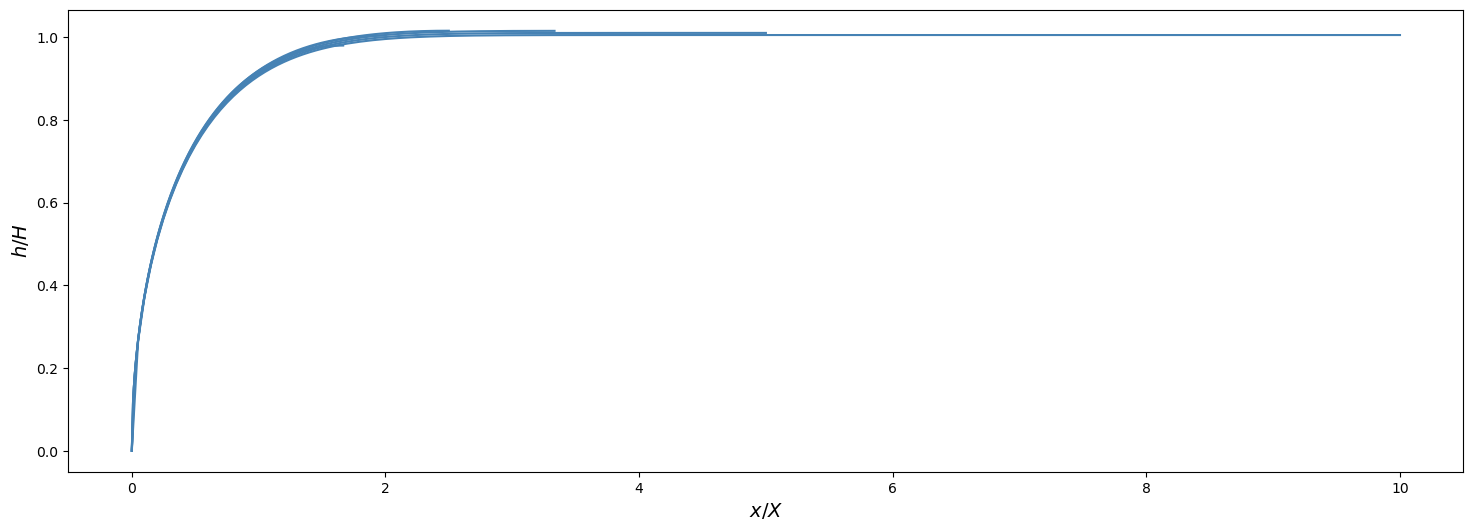

In [83]:
# Setup the numerical simulation
N = 200
# number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 0.6

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]
#x = np.zeros(x1.size)
# set initial time and current, h0, and future, h1, profiles
t = 0

h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
plt.figure(figsize=(18,6))
while t < t_final:

    # Boundary condition at the river
    h1[0] = 0

    # evolve the interior of the groundwater profile , the rainfall is given by the term 2*dx**2 inside the bracket
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2 + 2*dx**2)

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-1] 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1
    
    # plot the aquifer profile for each time step dt
    if t > t_plot: 
        plt.plot(x/t,h0/t, color='steelblue')
        t_plot = t_plot + dt_plot
plt.xlabel('$x/X$', fontsize=14)
plt.ylabel('$h/H$', fontsize =14)
print(count)

The plot shows that $5$ curves corresponding to $5$ different values of $t$ at early time fall into the same curve.  That means it is affected strongly by the initial condition. The gradient is steepest near $x=0$, indicating faster drainage near the river. In the far field, the gradient is $0$, suggesting that water accumulates. This state corresponds to the interval of time where the portion the graph of the river flux is a straight line. In the numerical solution of $h$, it corresponds to the curves that reach straight line rapidly as we move far away from the river.

### Evaluating the numerical solution: aquifer drawdown: $R = 0$

Write a brief summary of the scaling argument for the behaviour of the groundwater aquifer once the rain has stopped, $R = 0$.  Modify your numerical solution to start with the groundwater aquifer in the steady-state balance between rainfall and flux into the river (reviewed above), and subsequently calculate the decay of the aquifer height and river flux.  Again, plot your results using a suitable rescaling of the aquifer height to demonstrate collapse to a self-similar profile.  Compare the scaling of the numerically calculated river flux as a function of time to the results of your scaling analysis.

When the rain fall is switched off, the governing equation becomes $$\phi\frac{\partial h}{\partial t} = u_b \frac{\partial}{\partial x}\left(h\frac{\partial h}{\partial x}\right),$$
And the scaling is also reduced to 
$$ \phi \frac{H}{T} \sim u_b \frac{H^2}{L^2} $$ 

$$ H \sim \frac{\phi L^2}{T u_b}$$
Following the same reasoning in as in question (1), the scaled govering equation becomes
$$  \frac{\partial h'}{\partial t'} =  \frac{\partial }{\partial x'} \left( h' \frac{\partial h'}{\partial x'}\right)$$
and drop the primes to write 
$$  \frac{\partial h}{\partial t} =  \frac{\partial }{\partial x} \left( h \frac{\partial h}{\partial x}\right)$$

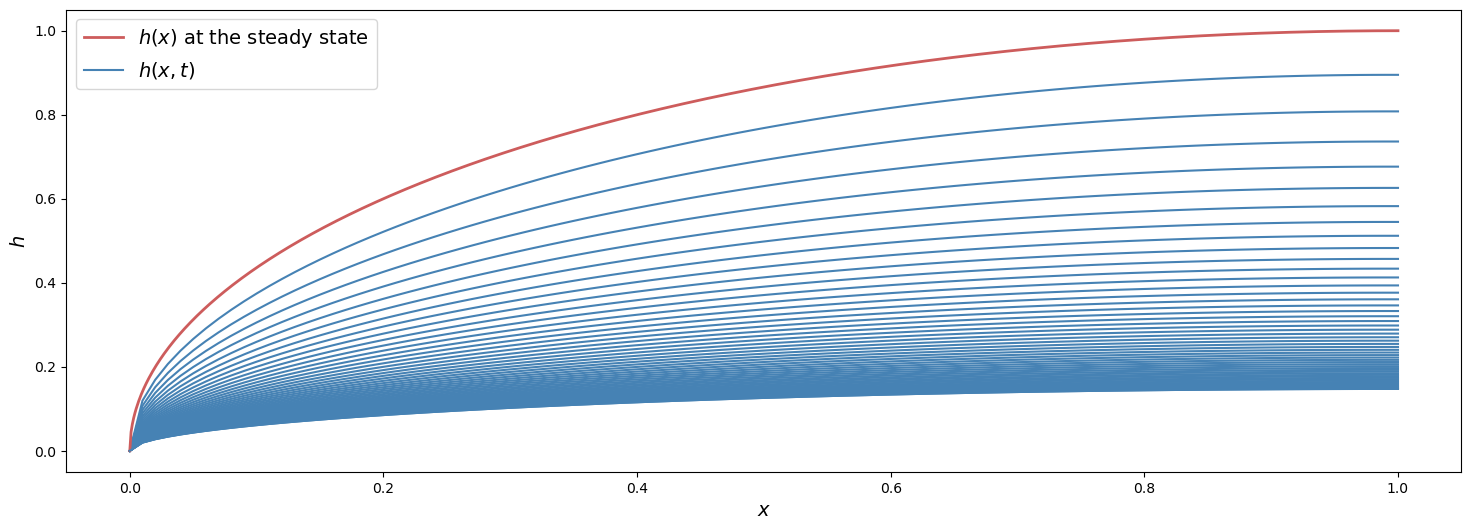

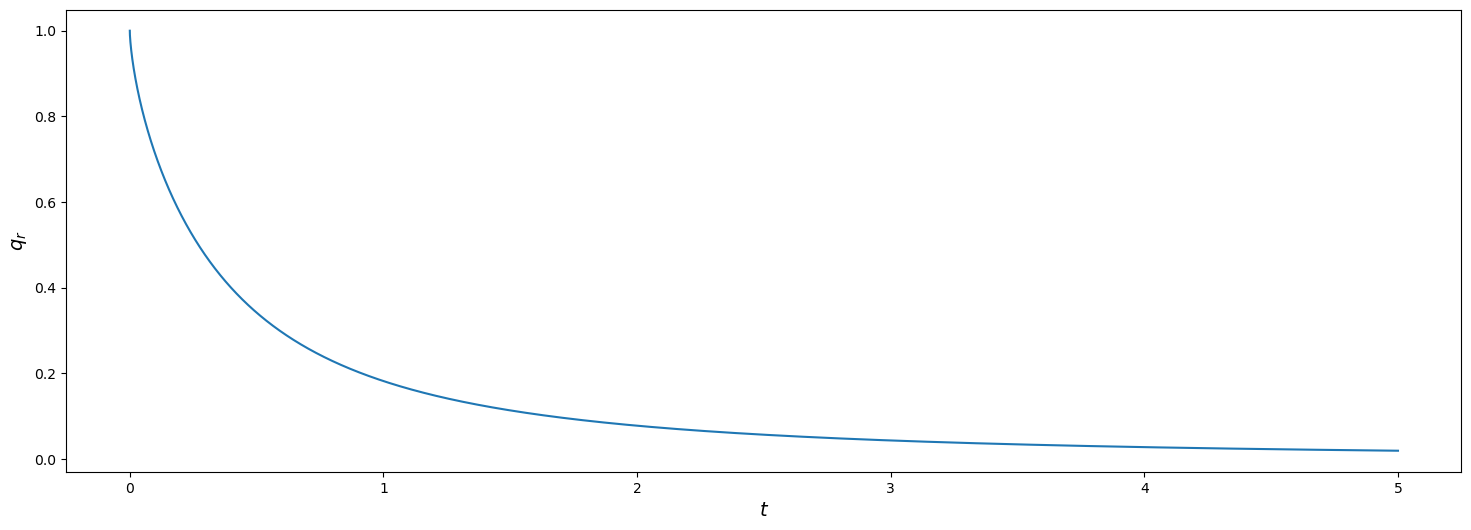

500001


In [33]:
# Setup the numerical simulation
N = 100         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 5

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time to be t=0 corresponding to the time when the rainfall was switched off
t = 0 
h0 = np.zeros(x.size)
for i in range(len(x)):
    h0[i] = steady_state(x[i]) # this is the appropriate initial condition for the aquifer drawdown: steady state
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 1  # flux into river is maximum at the steady state
plt.figure(figsize=(18,6))
while t < t_final:

    # Boundary condition at the river (verify this is the correct boundary condition)
    h1[0] = 0

    # evolve the interior of the groundwater profile (note, as given this does not include rainfall)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2 )

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-1] 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux
    flux = (h1[1]**2 - h1[0]**2)/(2*dx)
    time = np.append(time,t)
    qr = np.append(qr, flux)  # replace the "0" in this expression with a discrete expression for the river flux at x = 0

    # plot
    if t > t_plot: 
        plt.plot(x,h0, color='steelblue')
        t_plot = t_plot + dt_plot
#qr[-1] = 0 
# steady state profile for comparison
# it's worth calculating the steady-state profile to compare with your transient numerical solution.
# 
x_val = np.linspace(0,1,1000)
plt.plot(x_val, steady_state(x_val), linewidth = 2, color = 'indianred', label = '$h(x)$ at the steady state')
plt.legend(fontsize=14)
plt.plot(x, h0, label = '$h(x,t)$', color = 'steelblue')
plt.legend( fontsize=14)
plt.xlabel("$x$",  fontsize=14)
plt.ylabel("$h$",  fontsize=14)
plt.show()

plt.figure(figsize=(18,6))
plt.plot(time,qr)
plt.xlabel("$t$",  fontsize=14)
plt.ylabel("$q_r$",  fontsize=14)
plt.show()

print(count)

Consistently, at stedy state, the river flux is maxium. The rainfall has stopped, the aquifer profile demonstrates a rapid decline due a maximum discharge in the river. Concurrently, the river flux undergoes a progressive decrease (falling as $1/t$) and the impact on the aquifer profile diminishes. The vidange process of the aquifer is gradual, leading to a slow variation in the profile and a river flux asymptotically approaching $0$. In fact, the flow is driven by the hydrostatic pressure gradient, the lower the height of the aquifer, the weaker the pressure gradient, the smaller the discharge in the river. This result is consistent with the scaling analysis where we saw that the variation of the flux is similar to the variation of $1/t$.

### Aquifer response to variable rainfall: $R = R(t)$

Now calculate the response to variable rainfall, using the dimensionless rainfall rate given below.  You should plot the rainfall rate and the river flux as a function of time (preferably on the same time axis). Discuss your results.

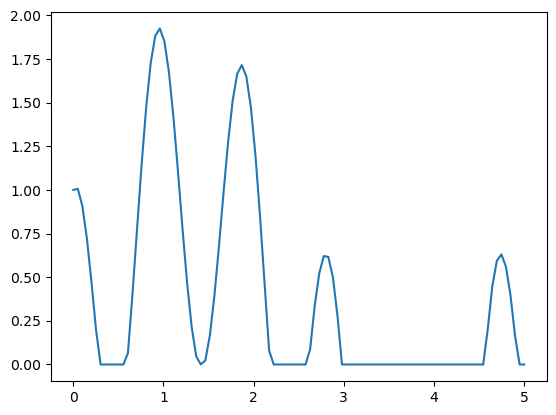

In [5]:
def R(t): 
    return np.fmax(np.cos(t/.15) + np.sin(t/.8),0)
t = np.linspace(0, 5, 100)
plt.plot(t, R(t))

500001


<Figure size 1800x600 with 0 Axes>

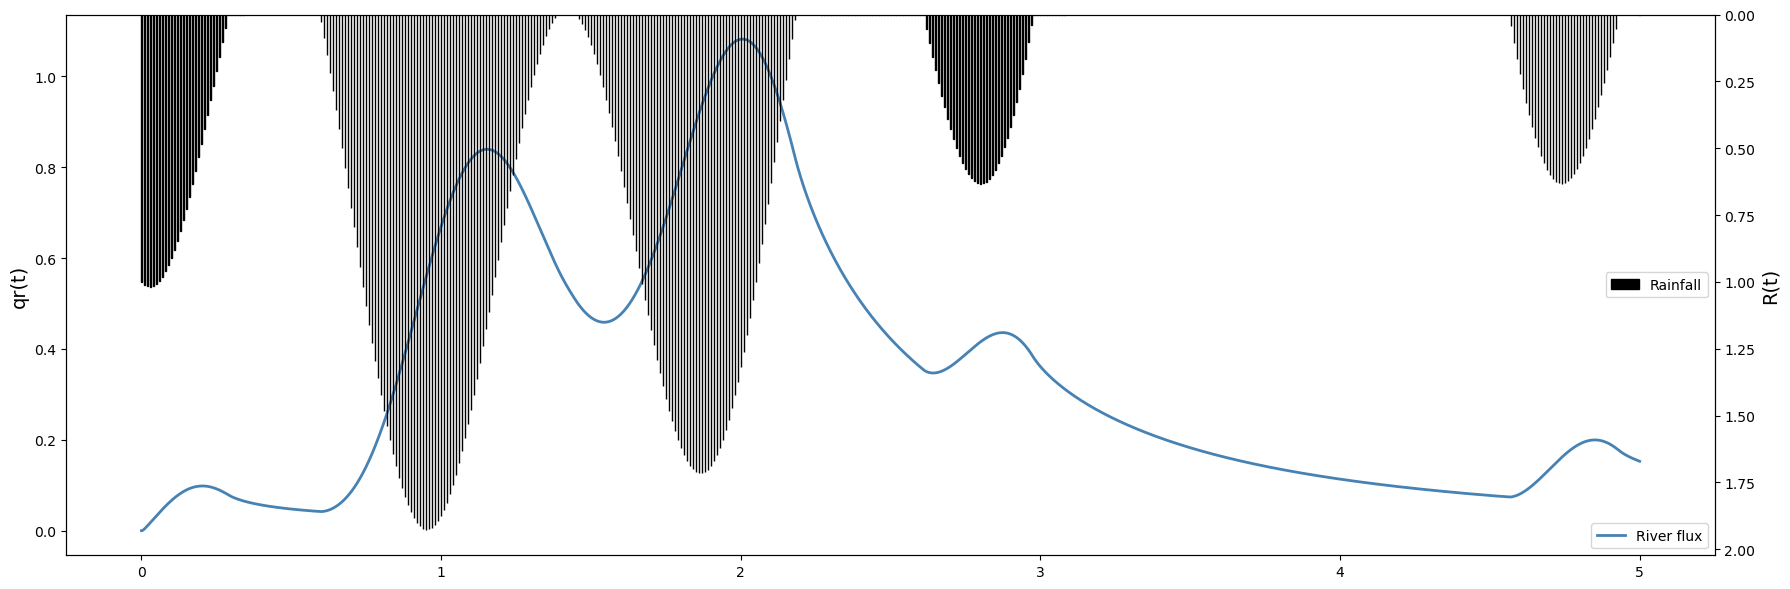

In [86]:
# Setup the numerical simulation
N = 100         # number of points
dx = 1/N       # grid size
dt = 0.1*dx**2 # time step

# end time for integration
t_final = 5

# plotting interval
dt_plot = 0.1
t_plot = dt_plot

# define numerical domain
x = np.arange(0,1+dx,dx) # Numerical grid on fixed domain x = [0,1]

# set initial time and current, h0, and future, h1, profiles
t = 0
h0 = np.zeros(x.size) # this is the appropriate initial condition for the aquifer rainfall problem
h1 = h0  # Initializes h1 at the same size as h0

# timestepping
count = 0
time = 0
qr = 0  # flux into river
plt.figure(figsize=(18,6))
while t < t_final:

    # Boundary condition at the river (verify this is the correct boundary condition)
    h1[0] = 0

    # evolve the interior of the groundwater profile (note, as given this does not include rainfall)
    for i in range(1, N):
        h1[i] = h0[i] + (dt/2/dx**2)*(h0[i-1]**2 -2*h0[i]**2 + h0[i+1]**2 + 2*R(t)*dx**2)

    # Boundary condition at the drainage divide (you need to change this)
    h1[N] = h1[N-1] 
    
    # update time, profile and counter
    t = t + dt
    h0 = h1
    count = count+1

    # record time and river flux
    flux = (h1[1]**2 - h1[0]**2)/(2*dx)   # the river flux is in the -x direction, therefore the formula becomes positive
    time = np.append(time,t)
    qr = np.append(qr, flux)    

# Crete the plot of the rainfall as histogram for different values of time  
t = time
Rainfall = np.zeros(t.size)   
for i in range(len(t)):
    Rainfall[i] = R(t[i])
    
# Just to make the histogram nicer, we should skip some values of th because the array t is large
skip_interval = 1000   
time_skipped = time[::skip_interval]  
rainfall_skipped = Rainfall[::skip_interval]    

# Create the plot 
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot flow rate on the bottom y-axis
ax1.plot(t, qr, color='steelblue', linewidth = 2, label ='River flux')
ax1.set_ylabel('qr(t)', fontsize=14)
ax1.legend(loc='lower right')

# Create a second y-axis that mirrors the rainfall (at the top)
ax2 = ax1.twinx()  
ax2.bar(time_skipped, rainfall_skipped, width=0.001, 
        align='center', color='black', edgecolor='black', label='Rainfall')
ax2.set_ylabel('R(t)', fontsize=14)
ax2.tick_params(axis='y')
ax2.invert_yaxis()
ax2.legend(loc ='right')
plt.tight_layout()
print(count)

The figure shows a consistent physical result as the river flux fluctuates with the rainfall rate. At the beginning, that is $t=0$, the response to the rainfall is not significant (very low peak observed in the river flux). The second in the rainfall is reached at $t=1$, and a progressive increase in the river flux is observed, reaching a first peak within a certain time after the rainfall peak and decaying gradually when the rainfall has stopped. The important observation here is that a second important rainfall event occurs one time scale later, and this time the river flux presents its maximum due to the influence of the two successive rainfall events. When the rain stops, the river flow dries up with an exponential decay. In summary, the result shows an existence of a characteristic of the model, which is the time of concentration (lag time after which the river reponse is maximum after a rainy event) and a recession coefficient wich characterizes the rate of decay of the river flow in dry period.